In [60]:
import pandas as pd
import datetime

In [32]:
header_names = ["title"]
for i in range(39):
    header_names.append(f"author{i}")

In [34]:
dfs = {}
for year in range(22):
    dfs["20%02d" % year] = pd.read_csv("../data/20%02d" % year, header=None, names=header_names)

In [39]:
dfs["2010"].shape[0]

292

In [48]:
for k in dfs:
    v = dfs[k]
    v["author0"] = v["author0"].apply(lambda x: x.lower().strip())

In [68]:
years = []
papers = []
new_papers = []
new_authors = []
author_pool = set(dfs["2000"]["author0"].tolist())
for year in range(21):
    old_year = "20%02d" % year
    new_year = "20%02d" % (year + 1)
    years.append(datetime.datetime(year + 2001, 12, 1))
    new_papers.append(dfs[new_year].shape[0] - dfs[old_year].shape[0])
    papers.append(dfs[new_year].shape[0])
    authors = set(dfs[new_year]["author0"].tolist())
    new_author_pool = authors - author_pool
    new_authors.append(len(new_author_pool))
    author_pool |= authors
df = pd.DataFrame()
df["Year"] = years
# df["papers"] = papers
df["New Papers"] = new_papers
df["New Authors"] = new_authors

<AxesSubplot:xlabel='year'>

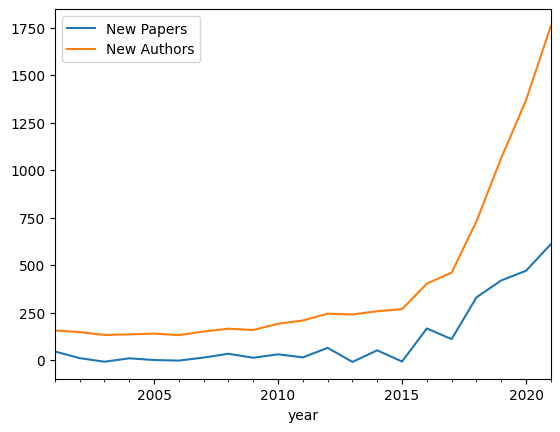

In [67]:
df.set_index(["Year"]).plot()